# 한눈에 보는 머신러닝

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# OECD의 삶의 만족도 데이터와 IMF의 1인당 GDP 데이터를 합침
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=='TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values = 'Value')
    gdp_per_capita.rename(columns={'2015': "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index('Country', inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                 left_index=True, right_index=True)
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [3]:
# 데이터 적재
oecd_bli = pd.read_csv('C:/Users/A/Documents/handson-ml-master/datasets/lifesat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('C:/Users/A/Documents/handson-ml-master/datasets/lifesat/gdp_per_capita.csv', thousands=',',
                            delimiter='\t',encoding='latin1', na_values='n/a')

In [4]:
# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

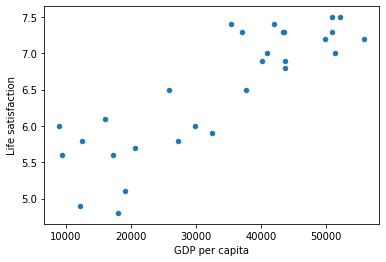

In [6]:
# 데이터 시각화
country_stats.plot(kind='scatter', x= 'GDP per capita', y = 'Life satisfaction')
plt.show()

모델 기반 학습

In [11]:
# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()
# 모델 훈련
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# 키프로스에 대한 예측
X_new = [[22587]] # 키프로스 1인당 GDP
print(model.predict(X_new)) # 결과 [[5.96242338]]

[[5.96242338]]


사례 기반 학습

In [15]:
import sklearn.neighbors
# k-최근접 이웃
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [16]:
X_new = [[22587]]
print(model.predict(X_new)) # 5.77 (가까운 나라를 고려하여 예측)

[[5.76666667]]


# 연습문제

1. 머신러닝을 정의해 보세요.

-머신러닝은 데이터로부터 수집할 수 있는 시스템을 만드는것.
학습이란 어떤 작업에서 주어진 성능 지표가 더 나아지는 것을 의미

2.머신러닝 도움을 줄 수 있는 문제 유형 네 가지를 말해보세요.

-명확한 해결책이 없는 복잡한 문제

-수작업으로 만든 긴 규칙 리스트를 대체하는 경우

-변화하는 환경에 적응하는 시스템을 만드는 경우

-사람에게 통찰을 제공해야 하는 경우

3. 레이블된 훈련 세트란 무엇인가.

-각 샘플에 대해 원하는 정답(레이블)을 담고 있는 훈련 세트

4. 가장 널리 사용되는 지도 학습 두 가지는 무엇인가.

-회귀, 분류

5.보편적인 비지도 학습 작업 네 가지는 무엇인가.

-군집, 시각화, 차원축소, 연관 규칙 학습

6.사전 정보가 없는 여러 지형에서 로봇을 걸어가게 하려면 어떤 종류의 머신러닝 알고리즘을 사용할 수 있는가.

-강화 학습이 가장 좋은 방법. 전형적으로 강화 학습이 다루는 유형의 문제. 이 문제를 지도학습이나 비지도 학습으로 표현하는 것도 가능하지만 일반적이지 않음

7.고객을 여러 그룹으로 분할하려면 어떤 알고리즘을 사용해야 하는가.

-그룹을 어떻게 정의할지 모른다면 비슷한 고객끼리 군집으로 나누기 위해 군집 알고리즘(비지도 학습)을 사용할 수 있음.
그러나 어떤 그룹이 있어야 할지 안다면 분류 알고리즘(지도학습)에 각 그룹에 대한 샘플을 주입함. 그러면 알고리즘이 전체 고객을 이런 그룹으로 분류하게 될 것.

8.스팸 감지의 문제는 지도 학습과 비지도 학습 중 어떤 문제로 볼 수 있는가.

-스팸 감지는 전형적인 지도 학습 문제. 알고리즘에 많은 이메일과 상응하는 레이블(스팸인지 아닌지)이 제공.

9.온라인 학습 시스템이 무엇인가.

-온라인 학습 시스템은 배치 학습 시스템과 달리 점진적으로 학습할 수 있음.
이 방식은 변화하는 데이터와 자율 시스템에 빠르게 적응하고 매우 많은 양의 데이터를 훈련시킬 수 있음

10.외부 메모리 학습이 무엇인가.

-외부 메모리 알고리즘은 대용량의 데이터를 다룰 수 있음.
외부 메모리 학습 알고리즘은 데이터를 미니배치로 나누고 온라인 학습 기법을 사용해 학습.

11.예측을 하기 위해서 유사도 측정에 의존하는 학습 알고리즘은 무엇인가.

-인스턴스(사례) 기반 학습 시스템은 훈련 데이터를 기억하는 학습.
새로운 샘플이 주어지면 유사도 측정을 사용해 학습된 샘플 중에서 가장 비슷한 것을 찾아 예측으로 사용.

12.모델 파라미터와 학습 알고리즘 하이퍼파라미터 사이에는 어떤 차이가 있는가.

-하이퍼파라미터(적용할 규제의 정도)는 모델 학습 전에 미리 지정해야 하는 학습 알고리즘이 자체적으로 가지고 있는 파라미터.
반대로 만들어진 모델의 파라미터를 모델 파라미터(선형 모델의 기울기)라고 함.

13.모델 기반 알고리즘이 찾는 것은 무엇.
성공을 위해 이 알고리즘이 사용하는 가장 일반적인 전력은 무엇.
예측은 어떻게 생성.

-모델 기반 학습 알고리즘은 새로운 샘플에 잘 일반화되기 위한 모델 파라미터의 최적 값을 찾음.
일반적으로 훈련 데이터에서 시스템의 예측이 얼마나 나쁜지 측정하고 모델에 규제가 있다면 모델 복잡도에 대한 패널티를 더한 비용 함수를 최소화 함으로써 시스템을 훈련시킴.
예측을 만들려면 학습 알고리즘이 찾은 파라미터를 사용하는 모델의 예측 함수에 새로운 샘플의 특성을 주입.

14.머신러니으이 주요 도전 과제는 무엇.

- 부족한 데이터
- 낮은 데이터 품질
- 대표성 없는 데이터
- 무의미한 특성
- 훈련 데이터에 과소적합된 과도하게 간단한 모델
- 훈련 데이터에 과대적합된 과도하게 복잡한 모델

15.모델이 훈련 데이터에서의 성능은 좋지만 새로운 샘플에서의 일반화 성능이 나쁘다면 어떤 문제가 존재.
가능한 해결책 세 가지는 무엇.

-훈련 데이터에 과대적합(Overfitting)되었을 가능성이 높음.
이를 해결하기 위해서는 더 많은 데이터를 모으거나/ 모델을 단순화하거나(단순한 알고리즘 선택, 특성이나 파라미터의 수 줄이기, 모델에 규제를 추가)/ 훈련 데이터에 있는 잡음을 감소시키는 것

16. 테스트 세트가 무엇이고 왜 사용해야 하는가.

-실전에 배치되기 전에 모델이 새로운 샘플에 대해 만들 일반화 오차를 추정하기 위해 사용

17. 검증 세트의 목적은 무엇인가.

-모델을 비교하는데 사용.
이를 사용해 가장 좋은 모델을 고르고 하이퍼파라미터를 튜닝.
다양한 하이퍼파라미터로 여러 모델을 훈련시키고 검증세트에서 최상의 성능을 내는 모델과 하이퍼파라미터를 선택.

18.테스트 세트를 사용해 하이퍼파라미터를 튜닝하면 어떤 문제가 생기는가.

-테스트 데이터를 사용해 하이퍼파라미터를 튜닝하면 테스트 세트에 과대적합(Overfitting)될 위험이 있고, 일반화 오차는 매우 낙관적으로 측정될 것
(모델의 성능이 예상보다 나쁠 것)

19.교차 검증이 무엇이고, 왜 하나의 검증 세트보다 선호하는가.

-검증 세트를 별도로 분리하지 않고 (모델 선택과 하이퍼파라미터 튜닝을 위해) 모델을 비교할 수 있는 기술.
이는 훈련 데이터를 최대한 활용하도록 도움.